<a href="https://colab.research.google.com/github/JaecheolP/stm32/blob/main/real_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/JaecheolP/stm32.git
!git clone https://github.com/STMicroelectronics/stm32ai-modelzoo.git
!pip install -r stm32ai-modelzoo/requirements.txt

Cloning into 'stm32'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 28 (delta 4), reused 10 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), 13.67 MiB | 13.89 MiB/s, done.
Cloning into 'stm32ai-modelzoo'...
remote: Enumerating objects: 2331, done.
remote: Counting objects: 100% (413/413), done.
remote: Compressing objects: 100% (343/343), done.
remote: Total 2331 (delta 81), reused 334 (delta 52), pack-reused 1918
Receiving objects: 100% (2331/2331), 174.18 MiB | 24.35 MiB/s, done.
Resolving deltas: 100% (623/623), done.
Updating files: 100% (1920/1920), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.5/498.5 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 KB 

In [1]:
%cd stm32ai-modelzoo/image_classification/scripts/training

/content/stm32ai-modelzoo/image_classification/scripts/training


In [2]:
!sed -i '53s\C:/en.x-cube-ai-windows_v7.3.0/windows/stm32ai.exe\/content/stm32/stm32ai\g' user_config.yaml

In [3]:
!cat user_config.yaml

general:
  project_name: tf_flowers
  logs_dir: logs
  saved_models_dir: saved_models

train_parameters:
  batch_size: 64
  training_epochs: 1000
  optimizer: adam
  initial_learning: 0.001
  learning_rate_scheduler: reducelronplateau

dataset:
  name: flowers
  class_names: [daisy,dandelion,roses,sunflowers,tulips]
  training_path: datasets/flower_photos
  validation_path:
  test_path: 

pre_processing:
  rescaling: {scale : 127.5, offset : -1}
  resizing: nearest
  aspect_ratio: False
  color_mode: rgb

data_augmentation:
  RandomFlip: horizontal_and_vertical
  RandomTranslation: [0.1, 0.1]
  RandomRotation: 0.2
  RandomZoom: 0.2
  RandomContrast: 0.2
  RandomBrightness: 0.4
  RandomShear: False

model:
  model_type: {name : mobilenet, version : v2, alpha : 0.35}
  input_shape: [128, 128, 3]
  transfer_learning : True
  dropout: 0.5

quantization:
  quantize: True
  evaluate: True
  quantizer: TFlite_converter
  quantization_type: PTQ
  quantization_input_type: uint8
  quantization_o

In [4]:
import getpass
import os
#Set environment variables with your credentials to acces STM32Cube.AI Developer Cloud Services
os.environ['stmai_username'] = 'sis3594@gmail.com'
print('Enter you password')
password = getpass.getpass()
os.environ['stmai_password'] = password

Enter you password
··········


In [5]:
import zipfile

dataset_name = 'tf_flowers'

if dataset_name == 'tf_flowers':
  path = 'datasets/flower_photos'
  !wget http://download.tensorflow.org/example_images/flower_photos.tgz -P datasets

  !7z x datasets/flower_photos.tgz -odatasets
  !7z x datasets/flower_photos.tar -odatasets
else :
  path = 'datasets/dataset'
  with zipfile.ZipFile('datasets/dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('datasets')

class_names = [ name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name)) ]
print(f"Classes: {class_names}")

--2023-03-17 00:17:04--  http://download.tensorflow.org/example_images/flower_photos.tgz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.204.128, 2607:f8b0:400c:c15::80
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.204.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘datasets/flower_photos.tgz’

flower_photos.tgz   100%[===================>] 218.21M  35.2MB/s    in 6.3s    

2023-03-17 00:17:10 (34.6 MB/s) - ‘datasets/flower_photos.tgz’ saved [228813984/228813984]


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 228813984 bytes (219 MiB)

Extracting archive: datasets/flower_photos.tgz
--
Path = datasets/flower_photos.tgz
Type = 

2023/03/15 15:00:38 INFO mlflow.tracking.fluent: Experiment with name 'tf_flowers' does not exist. Creating a new experiment.


2031616/2019640 [==============================] - 0s 0us/step
Model: "mobilenet_v2_alpha_0.35"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 64, 64, 16)   432         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 64, 64, 16)  64          ['conv2d[0][0]']                 
 alization)                                                                                       
             

100%|██████████| 5/5 [00:00<00:00, 81.04it/s]


[INFO] : Establishing a connection to STM32Cube.AI Developer Cloud to launch the model benchmark on STM32 target...
[INFO] : To create an account https://stm32ai-cs.st.com/home. Enter credentials:
[INFO] : Successfully connected, starting to analyze the model footprints ...
[INFO] : RAM Activations : 224.5 (KiB)
[INFO] : Flash weights : 406.86328125 (KiB)
[INFO] : MACCs : 19.099866 (M)
[INFO] : Starting training...
Epoch 1/1000
46/46 [==============================] - 27s 438ms/step - loss: 1.4429 - accuracy: 0.4653 - val_loss: 0.6327 - val_accuracy: 0.7847 - lr: 0.0010
Epoch 2/1000
46/46 [==============================] - 24s 413ms/step - loss: 0.8468 - accuracy: 0.6809 - val_loss: 0.5142 - val_accuracy: 0.8338 - lr: 0.0010
Epoch 3/1000
46/46 [==============================] - 21s 408ms/step - loss: 0.7198 - accuracy: 0.7333 - val_loss: 0.4904 - val_accuracy: 0.8297 - lr: 0.0010
Epoch 4/1000
46/46 [==============================] - 24s 425ms/step - loss: 0.6665 - accuracy: 0.7558 - va

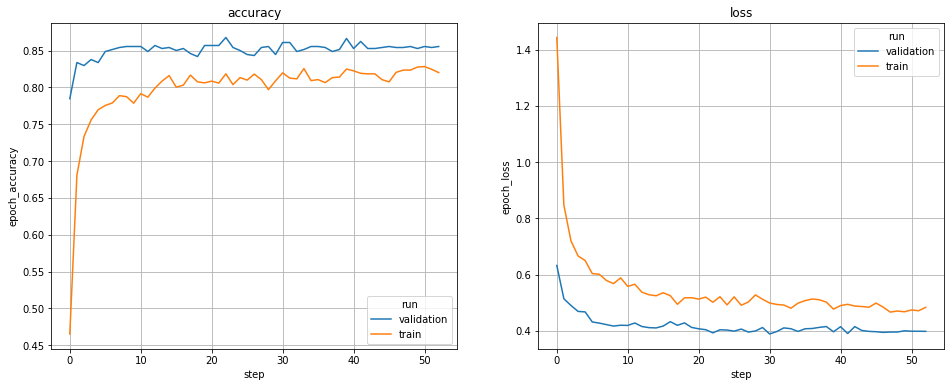

[INFO] : Test Accuracy = 86.78 %


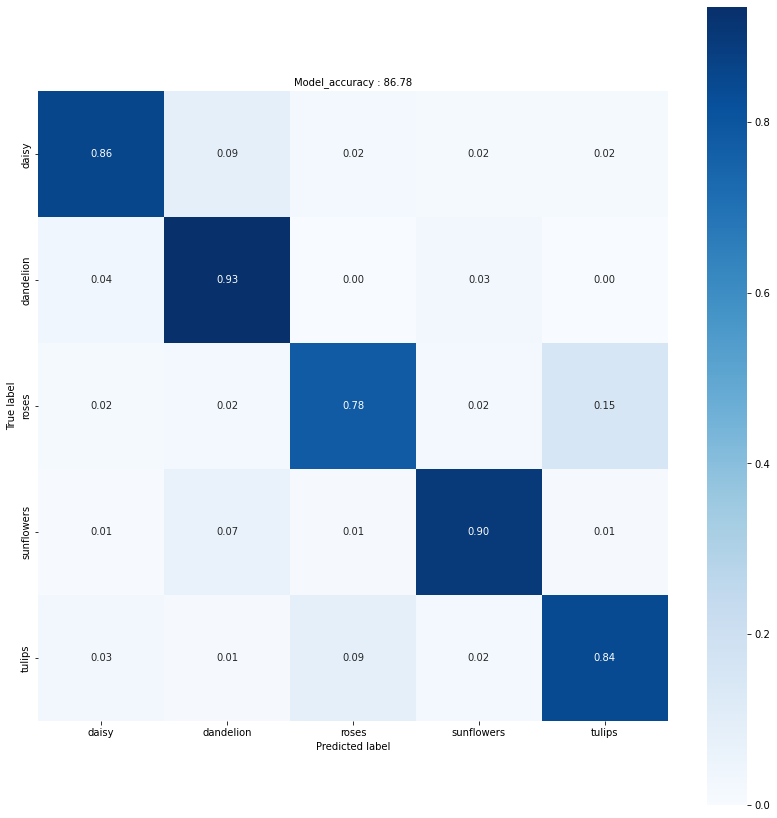

[INFO] : Quantizing the model ... This might take few minutes ...


100%|██████████| 46/46 [00:47<00:00,  1.03s/it]


[INFO] : Successfully connected, starting the model validation on target ...
[INFO] : Starting the benchmark on target STM32H747I-DISCO, other available boards  ['STM32F469I-DISCO', 'STM32L4R9I-DISCO', 'STM32H7B3I-DK', 'NUCLEO-G474RE', 'B-U585I-IOT02A', 'NUCLEO-H743ZI2', 'STM32F769I-DISCO', 'STM32H735G-DK', 'STM32H747I-DISCO']
[INFO] : Total RAM : 260.72265625 (KiB)
[INFO] :     RAM Activations : 224.5 (KiB)
[INFO] :     RAM Runtime : 36.22265625 (KiB)
[INFO] : Total Flash : 529.19921875 (KiB)
[INFO] :     Flash Weights  : 406.86328125 (KiB)
[INFO] :     Estimated Flash Code : 122.3359375 (KiB)
[INFO] : MACCs : 19.099866 (M)
[INFO] : Number of cycles : 44068983 
[INFO] : Inference Time : 110.17245805665152 (ms)
[INFO] Evaluating the quantized model ...


100%|██████████| 12/12 [00:42<00:00,  3.58s/it]


[INFO] : Quantized model Accuracy = 86.24 %


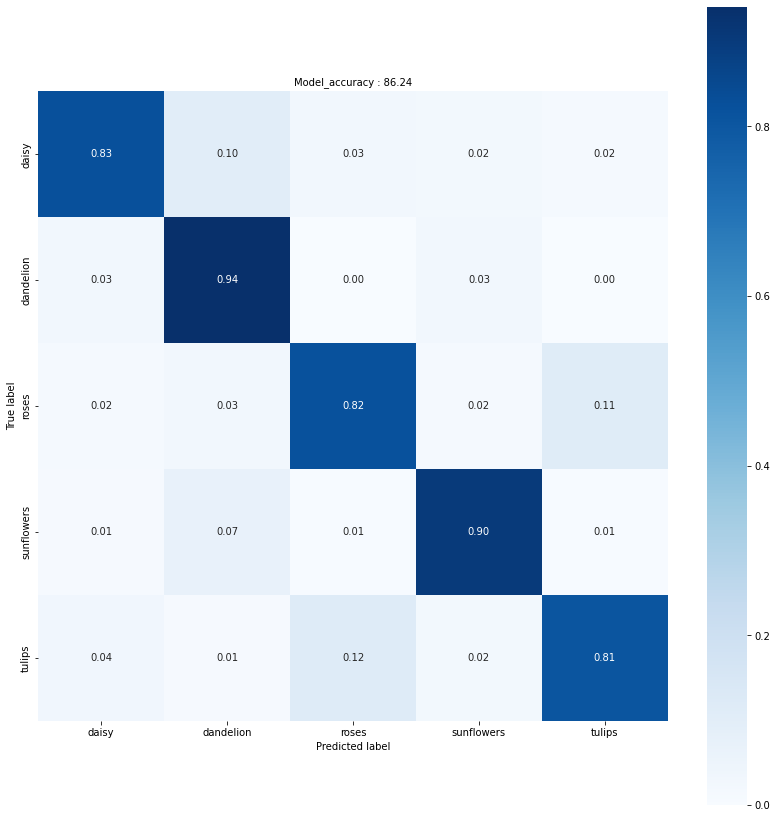

<Figure size 432x288 with 0 Axes>

In [ ]:
%run train.py

In [ ]:
import shutil
shutil.make_archive('outputs', 'zip', 'outputs')
from google.colab import files
files.download('outputs.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

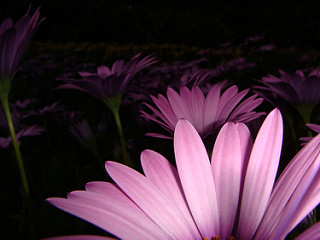

(320, 240)


In [15]:
import PIL.Image as pil

root = '/content/stm32ai-modelzoo/image_classification/scripts/training/datasets/flower_photos'
daisy = [f'{root}/daisy/{i}' for i in os.listdir(f'{root}/daisy')]

img = pil.open(daisy[4])

img.show()

print(img.size)